In [189]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [193]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [195]:
data=pd.read_csv("/content/Train.csv")

In [196]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [198]:
data.shape

(8523, 12)

In [199]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [200]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [201]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [202]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [203]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [204]:
data['Item_Fat_Content'].replace(['low fat',  'LF','reg'],
                        ['Low Fat', 'Low Fat','Regular'], inplace=True)



data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [205]:
fornum = preprocessing.LabelEncoder()
data['Item_Fat_Content']= fornum.fit_transform(data['Item_Fat_Content'])
data['Item_Fat_Content'].unique()

array([0, 1])

In [206]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [207]:
data['Item_Type']= fornum.fit_transform(data['Item_Type'])
data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [208]:
data["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [209]:
data['Outlet_Identifier']= fornum.fit_transform(data['Outlet_Identifier'])
data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [210]:
data["Outlet_Size"].unique()


array(['Medium', 'High', 'Small'], dtype=object)

In [211]:
data['Outlet_Size']= fornum.fit_transform(data['Outlet_Size'])
data['Outlet_Size'].unique()

array([1, 0, 2])

In [212]:
data["Outlet_Location_Type"].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [213]:
data['Outlet_Location_Type']= fornum.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [214]:
data["Outlet_Type"].unique()


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [215]:
data['Outlet_Type']= fornum.fit_transform(data['Outlet_Type'])
data['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [216]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [217]:
data['Item_Identifier']= fornum.fit_transform(data['Item_Identifier'])
data['Item_Identifier'].unique()

array([ 156,    8,  662, ..., 1323, 1524, 1519])

In [218]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


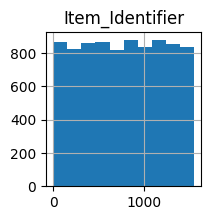

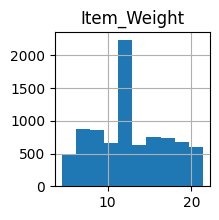

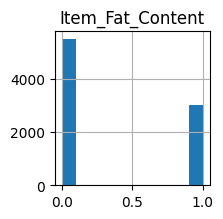

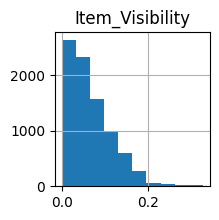

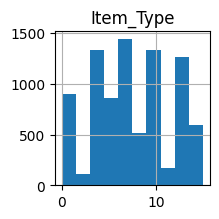

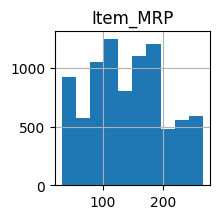

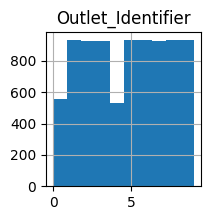

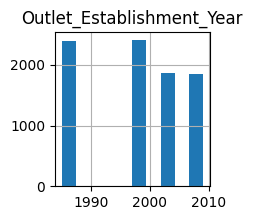

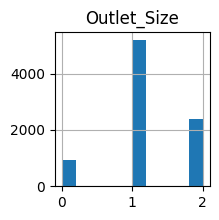

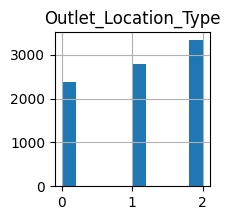

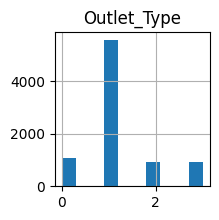

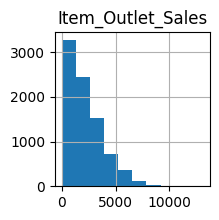

In [219]:
for col in data.columns:
    fig = plt.figure(figsize=(2,2))
    plt.title(f"{col}")
    data[col].hist()

<Axes: >

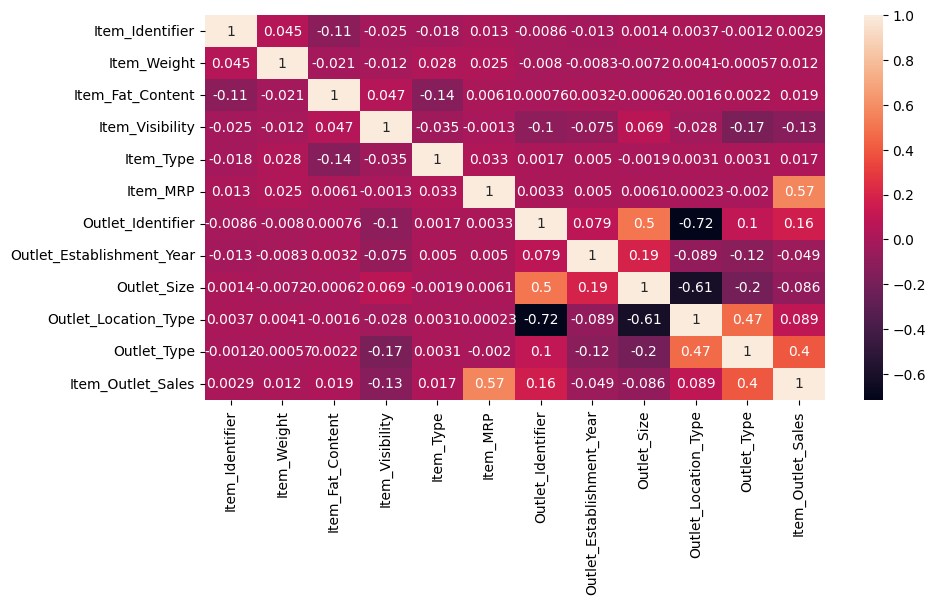

In [220]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [221]:
#Showing the uncorrelated features 
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
   for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
       colname=corr_matrix.columns[i]
       col_corr.add(colname)
  return col_corr

In [222]:
costing_features =correlation(data,0.015)
costing_features 

{'Item_Fat_Content',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type'}

In [223]:
 data.drop(['Item_Identifier'],axis=1,inplace=True)


<Axes: >

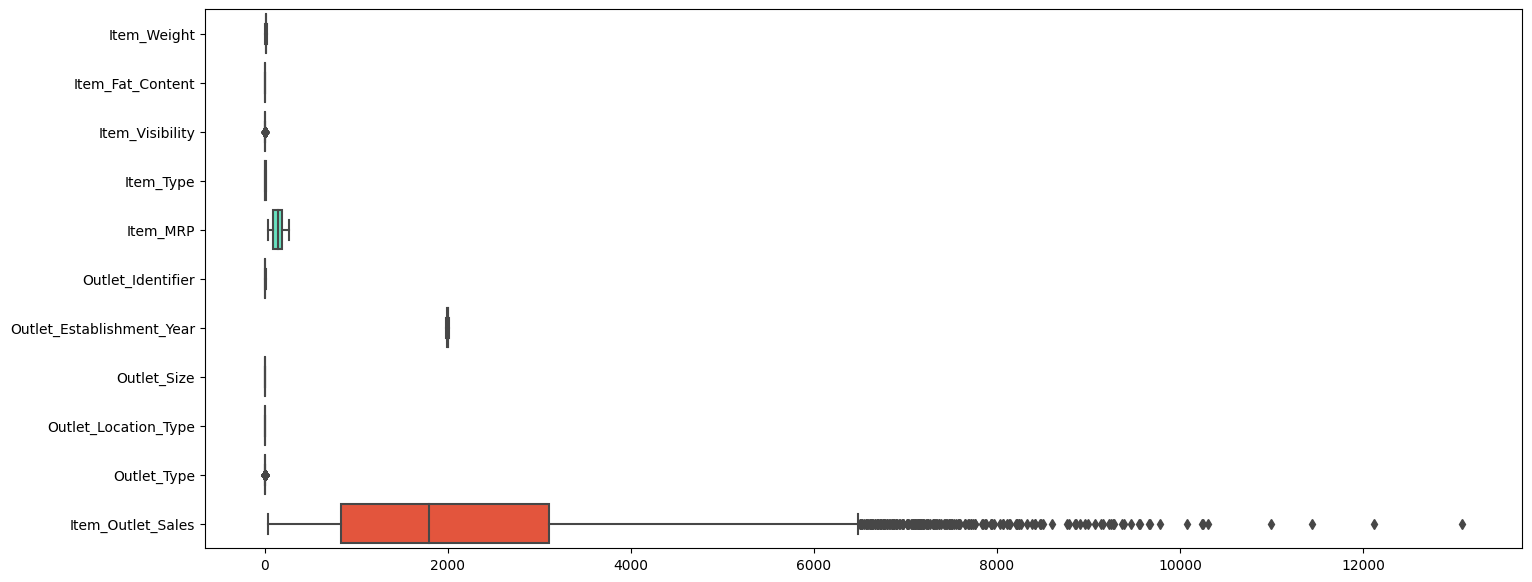

In [224]:
plt.subplots(figsize=(17,7))
sns.boxplot(data=data,palette='rainbow',orient='h')

Text(0.5, 0, 'Item_Visibility')

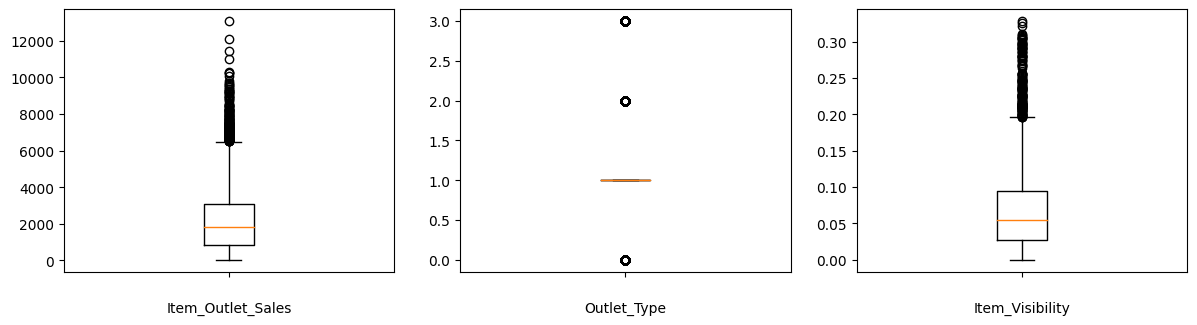

In [225]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(231)
plt.boxplot(data['Item_Outlet_Sales'],labels=' ');
plt.xlabel('Item_Outlet_Sales')
plt.subplot(232)
plt.boxplot(data['Outlet_Type'],labels=' ');
plt.xlabel('Outlet_Type')
plt.subplot(233)
plt.boxplot(data['Item_Visibility'],labels=' ');
plt.xlabel('Item_Visibility')



In [226]:
#Let's try get ride of outliers!
for x in ['Item_Outlet_Sales','Item_Visibility']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max


Text(0.5, 0, 'Item_Visibility')

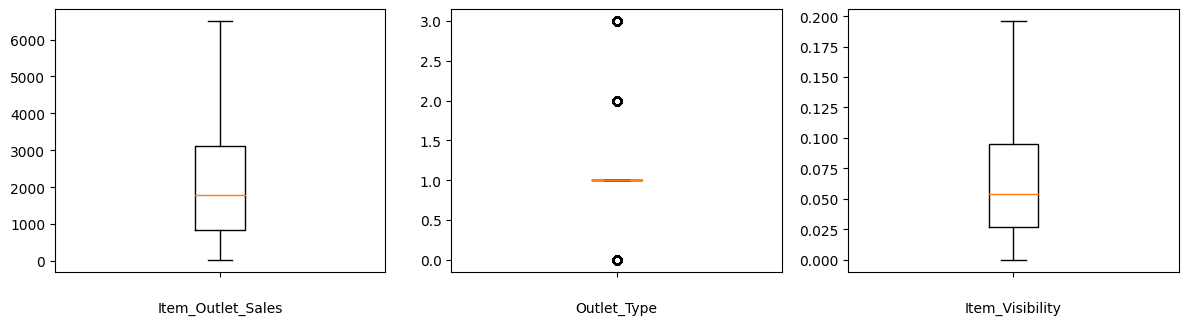

In [227]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(231)
plt.boxplot(data['Item_Outlet_Sales'],labels=' ');
plt.xlabel('Item_Outlet_Sales')
plt.subplot(232)
plt.boxplot(data['Outlet_Type'],labels=' ');
plt.xlabel('Outlet_Type')
plt.subplot(233)
plt.boxplot(data['Item_Visibility'],labels=' ');
plt.xlabel('Item_Visibility')



<Axes: >

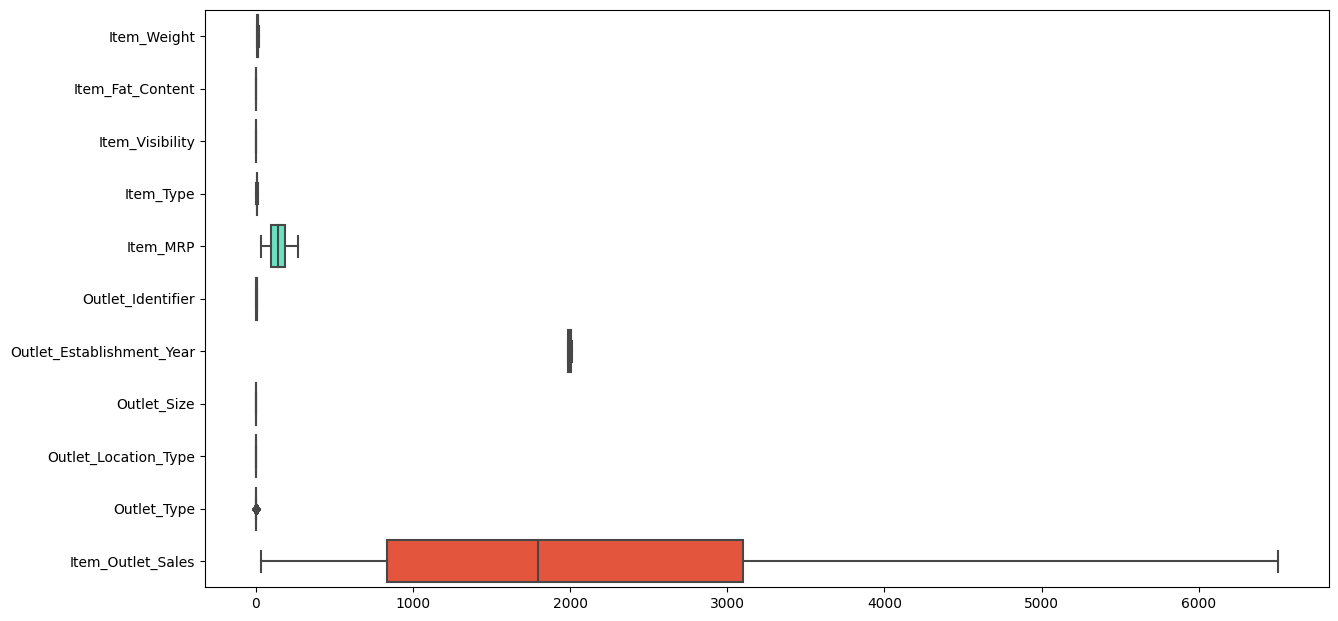

In [228]:
sns.boxplot(data=data,palette='rainbow',orient='h')

In [229]:
data.duplicated().sum()

0

In [230]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

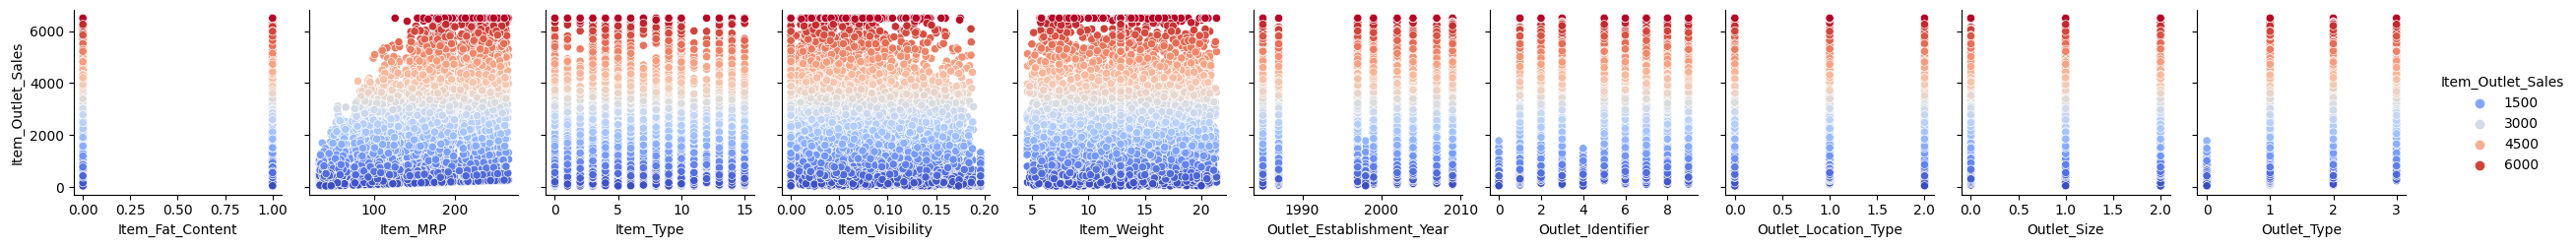

In [255]:
sns.pairplot(
    data,
    x_vars=['Item_Fat_Content',
 'Item_MRP',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type'],
    y_vars=["Item_Outlet_Sales"],hue='Item_Outlet_Sales',
    palette='coolwarm'
)

In [232]:
import plotly.express as ex
ex.pie(data,names='Outlet_Type',hole=0.20,width=500,height=500)

In [233]:
ex.pie(data,names='Outlet_Size',hole=0.20,width=500,height=500)

In [234]:
ex.pie(data,names='Outlet_Location_Type',hole=0.20,width=500,height=500)

<ipython-input-235-9790ce024b2b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

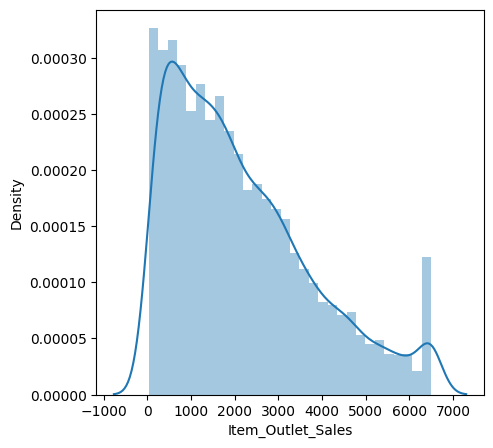

In [235]:
plt.subplots(figsize=(5,5))
sns.distplot(data['Item_Outlet_Sales'])

In [236]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.065307,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2156.313016
std,4.226124,0.477836,0.048841,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1624.863069
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.195979,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,6501.869900


In [237]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
 
dataset = load_iris()
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = dataset.data
response = dataset.target
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [238]:
object = StandardScaler()
object.fit_transform(data)

array([[-0.84187169, -0.73814723, -1.00862813, ..., -1.36933384,
        -0.25265831,  0.97172349],
       [-1.64170589,  1.35474328, -0.94247279, ...,  1.09156913,
         1.00297245, -1.05423697],
       [ 1.09855449, -0.73814723, -0.99403357, ..., -1.36933384,
        -0.25265831, -0.03633936],
       ...,
       [-0.53424315, -0.73814723, -0.61674377, ..., -0.13888236,
        -0.25265831, -0.59282283],
       [-1.33644372,  1.35474328,  1.6362903 , ...,  1.09156913,
         1.00297245, -0.19123682],
       [ 0.45963367, -0.73814723, -0.41829281, ..., -1.36933384,
        -0.25265831, -0.85590265]])

In [239]:
X=data.drop(["Item_Outlet_Sales"],axis=1)
Y=data["Item_Outlet_Sales"]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.24, random_state = 35)

**Linear Regression**

In [241]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 1306708.9960353135
MAE: 887.6181825286479
RMSE: 1143.1137283907115
r2_score: 0.013400615521905301


In [259]:
regressor.score(X_train,y_train)

0.5214912482567118

In [243]:
print(regressor.score(X_test, y_test))


0.5201474046603569


**Regularized Linear Regression**

In [244]:
ridge=Ridge(alpha=3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [   -2.29794958    42.12761102 -1091.8939384      1.33026178
    14.89673137    62.59285262     3.88742278  -365.79466615
  -230.47260289   832.55126025]


In [260]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5213819546922792
0.5149924158766415


In [246]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-2.30053961e+00  4.25240471e+01 -1.27014808e+03  1.26245034e+00
  1.48964744e+01  6.19565143e+01  3.80112052e+00 -3.64425286e+02
 -2.31761244e+02  8.32264613e+02]


In [247]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5197027039454827
0.520147505300856


**Random Forest Regressor**

In [248]:
RFR_model=RandomForestRegressor(n_estimators=100,random_state=1)
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [249]:
RFR_model_prediction = RFR_model.predict(X_test)


In [250]:
print("MSE:",mean_squared_error(RFR_model_prediction,y_test))
print("MAE:",metrics.mean_absolute_error(RFR_model_prediction,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(RFR_model_prediction,y_test)))
print("r2_score:",metrics.r2_score(RFR_model_prediction,y_test))

MSE: 1202744.8919210972
MAE: 795.8631351075269
RMSE: 1096.6972653932794
r2_score: 0.28016611809996683


In [261]:
RFR_model.score(X_test, y_test)

0.85072443330061

**XGB model**

In [267]:
#  create XGB model
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# fit the model to the data
xgb_reg.fit(X_train, y_train)

[15:29:46] WARNING: ../src/learner.cc:767: 
Parameters: { "objectvie" } are not used.



XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=2, num_parallel_tree=None,
             objectvie='reg:squarederror', predictor=None, ...)

In [268]:
xgb_reg_prediction = xgb_reg.predict(X_test)
print("MSE:",mean_squared_error(xgb_reg_prediction,y_test))
print("MAE:",metrics.mean_absolute_error(xgb_reg_prediction,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(xgb_reg_prediction,y_test)))
print("r2_score:",metrics.r2_score(xgb_reg_prediction,y_test))

MSE: 1061138.8110109132
MAE: 745.4794258795863
RMSE: 1030.1159211520387
r2_score: 0.3234468663165553


In [269]:
xgb_reg.score(X_test, y_test)

0.6171936836737498

**Saving The Final Model**

In [275]:
#Saving the model Random Forest Regressor
import pickle
filename = '/content/Test.csv'
pickle.dump(RFR_model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('/content/Test.csv', 'rb'))
